# Deep Learning

# Assignment 2 -CNN

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 26th November 2022

# Dataset -1 Grapevine Leaves Image Dataset

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12546188215428052402
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1358095566
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12000502220397015201
physical_device_desc: "device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
# ! pip install --upgrade pip
# ! pip install scikit-image
# ! pip install pandas
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install opencv-python

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [6]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D

from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential, load_model

from keras.layers import LeakyReLU

from datetime import datetime



#### We have 5 classes in our target variable and dataset consists of 500 images 100 images of each class

In [8]:
data_classes=['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

## We will use data augementation technique to create more images

In [9]:
datagen =ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

#### Creating images of all classes and saving them below code will be run only once

In [42]:
# for i in data_classes:
# #     print(i)
# #     print(type(i))

#     try:
#         augement_classes=i+str("_aug")
#         os.makedirs(augement_classes)
#     except:
#         print('file already exists')
        
#     pre=i    
#     augement_classes=i+str("_aug")
#     s=i+str("/")
#     print(s)
#     print(i)

#     image_directory = s
#     SIZE = 224
#     dataset = []
#     my_images = os.listdir(image_directory)
#     # print(my_images)
#     for i, image_name in enumerate(my_images):  
#     #     print(image_name)
#         if (image_name.split('.')[1] == 'png'):        
#     #         image = io.imread(image_directory+image_name) 


#             image=cv2.imread(image_directory+image_name)
#             image=Image.fromarray(image,'RGB')
#     #         ima=image


#     #         image = Image.fromarray(image, 'RGB')        
#             image = image.resize((SIZE,SIZE)) 
#             dataset.append(np.array(image))
#     x = np.array(dataset)
#     k = 0
#     for batch in datagen.flow(x, batch_size=32,
#                               save_to_dir= augement_classes,
#                               save_prefix= pre,
#                               save_format='png'):    
#         k += 1    
#         if k > 20:        
#             break

Ak/
Ak
Ala_Idris/
Ala_Idris
Buzgulu/
Buzgulu
Dimnit/
Dimnit
Nazli/
Nazli


# Initial Data preprocessing

### Data will be put through following data processing:

##### 1) Making intial dataset with image paths, directories and names

##### 2) Reading images 

##### 3) Converting images to array

##### 4) Reszizing image 

##### 5) Forming final dataset with image array, image path, image name, image class etc

##### 6) Making train test datsest

##### 7) Normalizing the train , test data

## 1) Making Dataset

In [10]:
data = pd.DataFrame()
main_path = ''
path_Ak = main_path + 'Ak_aug'
path_Ala_Idris = main_path + 'Ala_Idris_aug'
path_Buzgulu = main_path + 'Buzgulu_aug'
path_Dimnit = main_path + 'Dimnit_aug'
path_Nazli = main_path + 'Nazli_aug'

data['images_name'] = os.listdir(path_Ak) + os.listdir(path_Ala_Idris) + os.listdir(path_Buzgulu) + os.listdir(path_Dimnit) + os.listdir(path_Nazli)

classes = []
paths = []
for image in data['images_name']:
    class_ = image.split('_')[0]
    
    if class_ == 'Ala':
        class_='Ala_Idris'
        
    classes.append(class_)
    paths.append(main_path+class_+'_aug/'+image)

data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

2660


,images_name,classes,path
0,Ak_0_1444.png,Ak,Ak_aug/Ak_0_1444.png
1,Ak_0_239.png,Ak,Ak_aug/Ak_0_239.png
2,Ak_0_3411.png,Ak,Ak_aug/Ak_0_3411.png
3,Ak_0_9221.png,Ak,Ak_aug/Ak_0_9221.png
4,Ak_0_9529.png,Ak,Ak_aug/Ak_0_9529.png


In [11]:
li = data.classes.unique()

li=list(li)


In [12]:
li

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

## 2) Reading images  3) Converting images to array  4) Reszizing image 

In [13]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=64



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']
    
#     print(type(p))
    
#     p= p+str("_aug")
    
#     print(p)
    

    image=cv2.imread(p)
#     print(image)
    image=Image.fromarray(image,'RGB')
    
#     image=Image.fromarray(image,'RGB')
#     print(image.size)
    #resize the image
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))
    
    if c == 'Ak':
        cl = 0
        
    elif c == 'Ala_Idris':
        cl = 1
    elif c == 'Buzgulu':
        cl = 2
    elif c == 'Dimnit':
        cl = 3
    elif c == 'Nazli':
        cl = 4
    
    pic.append(image)
    label.append(cl)



## 5) Forming final dataset with image array, image path, image name, image class etc

In [14]:
dataset = im

print(type(im))
print(type(label))

dataset=np.array(dataset)
label=np.array(label)

print(type(dataset))
print(type(label))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<ipython-input-15-4411c8e41d7f>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-15-4411c8e41d7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


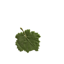

In [15]:
df['im_array']= im
df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [16]:
df.shape

(2660, 6)

In [17]:
li

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

## 6) Making train test datsest  7) Normalizing the train , test data

## Splitting data into train test 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

num_classes = 5

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


(2128, 64, 64, 3)
(2128,)


## Making a image preprocessing augmentation for CNN input

### Data will be put through following image processing before being given to CNN:

##### 1) flips (horizaontal_vertical)

##### 2) Zooming

##### 3) Shifting (height and width)

##### 4) Rotation 

In [19]:

datagen_preprocessing =ImageDataGenerator(                                          
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

# Building Model

#### Making a dataset to store results in

In [21]:
df_r=pd.DataFrame(columns=['activation_function','number_filters','pooling','epochs','test_accuracy'])

df_r

,activation_function,number_filters,pooling,epochs,test_accuracy


### Making a function model for our use

### Note:

For this model we have used Adam optimizer (which was found performing better than RMSprop) as Adam mostly gives bteer results

The Learning rate of Adam is 0.001

We have used following callbacks in fitting:

    1) Early Stopping:
    
        i) patience = 25 (that is if the best results dont improve after 25 epochs the model will stop early)
        
        ii) baseline = 0.2 (if models val-accuracy doesnt imporve than 0.2 in the patinece interval of 25 epochs model will stop early)
        
        iii) monitroing val-accuracy (test set accuracy)
        
    2)  ModelCheckpoint -(Which will save the results of epoch which gives maximum accuracy)

In [40]:
def CNN_model(filt,activation_function,pool,epoch):

    model = Sequential()
    model.add(Conv2D(filters=filt, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Flatten())
    # model.add(Dense(units=512, activation="relu"))
    # model.add(BatchNormalization())
    model.add(Dense(units=512, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=256, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes,  activation="softmax"))

    model.summary()


    batch_size = 32

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


    # Let's train the model_1 using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25, baseline=0.2, restore_best_weights=True)

    
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=4, min_lr=0.0005)

    filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    
    now = datetime.now
    t= now()


    history = model.fit(datagen_preprocessing.flow(x_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                                batch_size=batch_size,
                                epochs=epoch,
                                validation_data=(x_test, y_test),
                                callbacks=[checkpoint,es],
                                shuffle=True)




    print('Training time: %s' % (now() - t))
    
    
    model_l2 = load_model(filepath)

    score = model_l2.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
                        'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

# Find the best Relu Variants

In [23]:
act=['relu','elu','gelu','selu','LeakyReLU']

#### Best activation with max pooling

relu
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                 

67/67 [==============================] - ETA: 0s - loss: 0.9921 - accuracy: 0.6048
Epoch 15: val_accuracy did not improve from 0.55451
67/67 [==============================] - 5s 73ms/step - loss: 0.9921 - accuracy: 0.6048 - val_loss: 1.4363 - val_accuracy: 0.4154
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.6076
Epoch 16: val_accuracy did not improve from 0.55451
67/67 [==============================] - 5s 72ms/step - loss: 0.9734 - accuracy: 0.6076 - val_loss: 6.5949 - val_accuracy: 0.2481
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 0.9371 - accuracy: 0.6311
Epoch 17: val_accuracy did not improve from 0.55451
67/67 [==============================] - 5s 72ms/step - loss: 0.9371 - accuracy: 0.6311 - val_loss: 10.2695 - val_accuracy: 0.2538
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 0.8916 - accuracy: 0.6518
Epoch 18: val_accuracy did not improve from 0.55451
67/67 [=======================

67/67 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.8416
Epoch 44: val_accuracy did not improve from 0.76880
67/67 [==============================] - 5s 79ms/step - loss: 0.4680 - accuracy: 0.8416 - val_loss: 1.1758 - val_accuracy: 0.6429
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.8459
Epoch 45: val_accuracy did not improve from 0.76880
67/67 [==============================] - 5s 80ms/step - loss: 0.4779 - accuracy: 0.8459 - val_loss: 1.1423 - val_accuracy: 0.6316
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.4547 - accuracy: 0.8369
Epoch 46: val_accuracy did not improve from 0.76880
67/67 [==============================] - 5s 79ms/step - loss: 0.4547 - accuracy: 0.8369 - val_loss: 3.7342 - val_accuracy: 0.2368
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.8271
Epoch 47: val_accuracy did not improve from 0.76880
67/67 [========================

67/67 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8858
Epoch 73: val_accuracy did not improve from 0.85902
67/67 [==============================] - 5s 74ms/step - loss: 0.3393 - accuracy: 0.8858 - val_loss: 10.2538 - val_accuracy: 0.1917
Epoch 74/100
67/67 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8802
Epoch 74: val_accuracy did not improve from 0.85902
67/67 [==============================] - 6s 84ms/step - loss: 0.3527 - accuracy: 0.8802 - val_loss: 1.7265 - val_accuracy: 0.5489
Epoch 75/100
67/67 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8835
Epoch 75: val_accuracy did not improve from 0.85902
67/67 [==============================] - 6s 92ms/step - loss: 0.3365 - accuracy: 0.8835 - val_loss: 2.1981 - val_accuracy: 0.4906
Epoch 76/100
67/67 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8820
Epoch 76: val_accuracy did not improve from 0.85902
67/67 [=======================

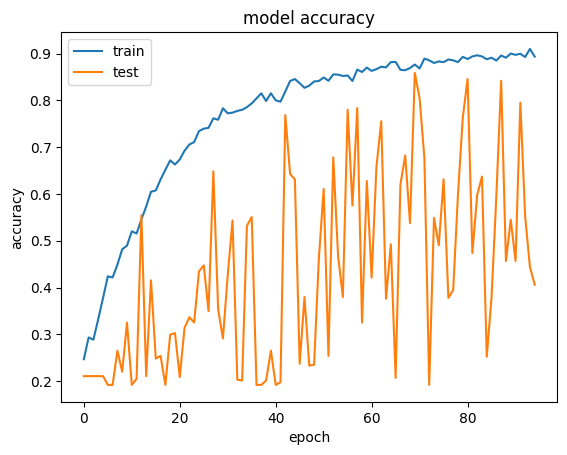

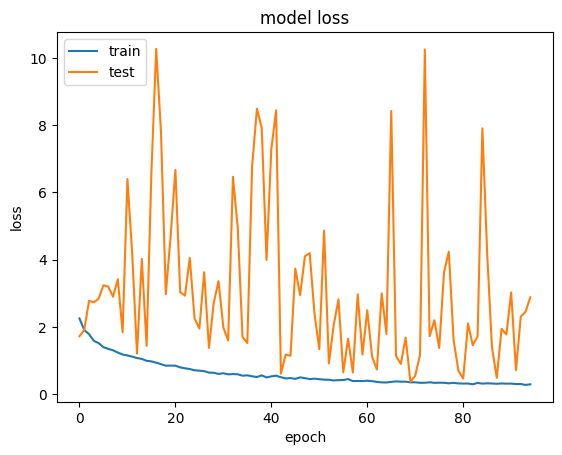

elu
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_49 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                  

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 batch_normalization_52 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_53 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_54 (Bat  (None, 256)              1024      
 chNormalization)                                                
          

Epoch 23/100
67/67 [==============================] - ETA: 0s - loss: 0.7656 - accuracy: 0.7119
Epoch 23: val_accuracy did not improve from 0.41541
67/67 [==============================] - 6s 85ms/step - loss: 0.7656 - accuracy: 0.7119 - val_loss: 3.3211 - val_accuracy: 0.2914
Epoch 24/100
67/67 [==============================] - ETA: 0s - loss: 0.7314 - accuracy: 0.7171
Epoch 24: val_accuracy did not improve from 0.41541
67/67 [==============================] - 7s 103ms/step - loss: 0.7314 - accuracy: 0.7171 - val_loss: 3.6561 - val_accuracy: 0.3365
Epoch 25/100
67/67 [==============================] - ETA: 0s - loss: 0.7363 - accuracy: 0.7209
Epoch 25: val_accuracy improved from 0.41541 to 0.52444, saving model to model_64_elu_max.hdf5
67/67 [==============================] - 7s 97ms/step - loss: 0.7363 - accuracy: 0.7209 - val_loss: 1.8377 - val_accuracy: 0.5244
Epoch 26/100
67/67 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.7317
Epoch 26: val_accuracy did

Epoch 52/100
67/67 [==============================] - ETA: 0s - loss: 0.4280 - accuracy: 0.8430
Epoch 52: val_accuracy did not improve from 0.82519
67/67 [==============================] - 6s 94ms/step - loss: 0.4280 - accuracy: 0.8430 - val_loss: 1.2315 - val_accuracy: 0.6184
Epoch 53/100
67/67 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8379
Epoch 53: val_accuracy did not improve from 0.82519
67/67 [==============================] - 6s 93ms/step - loss: 0.4490 - accuracy: 0.8379 - val_loss: 1.3461 - val_accuracy: 0.5846
Epoch 54/100
67/67 [==============================] - ETA: 0s - loss: 0.4350 - accuracy: 0.8449
Epoch 54: val_accuracy did not improve from 0.82519
67/67 [==============================] - 6s 90ms/step - loss: 0.4350 - accuracy: 0.8449 - val_loss: 2.6432 - val_accuracy: 0.3647
Epoch 55/100
67/67 [==============================] - ETA: 0s - loss: 0.4189 - accuracy: 0.8468
Epoch 55: val_accuracy did not improve from 0.82519
67/67 [===========

67/67 [==============================] - ETA: 0s - loss: 0.3034 - accuracy: 0.9041
Epoch 81: val_accuracy did not improve from 0.86278
67/67 [==============================] - 7s 109ms/step - loss: 0.3034 - accuracy: 0.9041 - val_loss: 7.6353 - val_accuracy: 0.2274
Epoch 82/100
67/67 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.8900
Epoch 82: val_accuracy did not improve from 0.86278
67/67 [==============================] - 6s 91ms/step - loss: 0.3111 - accuracy: 0.8900 - val_loss: 3.2726 - val_accuracy: 0.4455
Epoch 83/100
67/67 [==============================] - ETA: 0s - loss: 0.3330 - accuracy: 0.8802
Epoch 83: val_accuracy improved from 0.86278 to 0.91917, saving model to model_64_elu_max.hdf5
67/67 [==============================] - 7s 103ms/step - loss: 0.3330 - accuracy: 0.8802 - val_loss: 0.2219 - val_accuracy: 0.9192
Epoch 84/100
67/67 [==============================] - ETA: 0s - loss: 0.3215 - accuracy: 0.8896
Epoch 84: val_accuracy did not improve

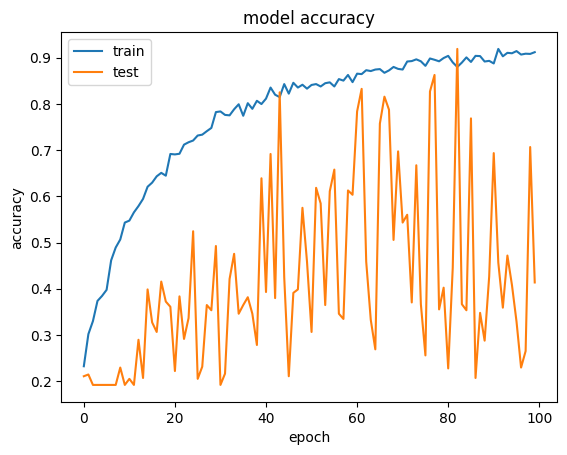

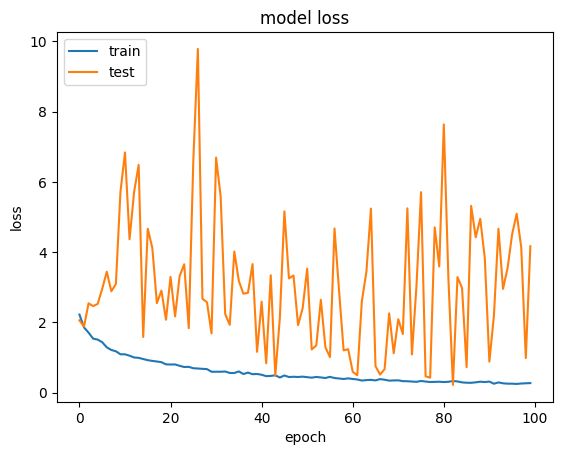

gelu
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_56 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 


<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 conv2d_33 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_57 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_58 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
          

67/67 [==============================] - ETA: 0s - loss: 0.9635 - accuracy: 0.6203
Epoch 18: val_accuracy did not improve from 0.31579
67/67 [==============================] - 9s 127ms/step - loss: 0.9635 - accuracy: 0.6203 - val_loss: 13.8268 - val_accuracy: 0.1917
Epoch 19/100
67/67 [==============================] - ETA: 0s - loss: 0.8828 - accuracy: 0.6490
Epoch 19: val_accuracy improved from 0.31579 to 0.33271, saving model to model_64_gelu_max.hdf5
67/67 [==============================] - 9s 137ms/step - loss: 0.8828 - accuracy: 0.6490 - val_loss: 5.2974 - val_accuracy: 0.3327
Epoch 20/100
67/67 [==============================] - ETA: 0s - loss: 0.9159 - accuracy: 0.6452
Epoch 20: val_accuracy did not improve from 0.33271
67/67 [==============================] - 10s 150ms/step - loss: 0.9159 - accuracy: 0.6452 - val_loss: 18.1413 - val_accuracy: 0.1917
Epoch 21/100
67/67 [==============================] - ETA: 0s - loss: 0.8710 - accuracy: 0.6612
Epoch 21: val_accuracy did not im

Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.8153
Epoch 47: val_accuracy did not improve from 0.57707
67/67 [==============================] - 11s 171ms/step - loss: 0.4998 - accuracy: 0.8153 - val_loss: 4.3802 - val_accuracy: 0.2538
Epoch 48/100
67/67 [==============================] - ETA: 0s - loss: 0.5182 - accuracy: 0.8097
Epoch 48: val_accuracy did not improve from 0.57707
67/67 [==============================] - 13s 191ms/step - loss: 0.5182 - accuracy: 0.8097 - val_loss: 4.5127 - val_accuracy: 0.2650
Epoch 49/100
67/67 [==============================] - ETA: 0s - loss: 0.4949 - accuracy: 0.8271
Epoch 49: val_accuracy did not improve from 0.57707
67/67 [==============================] - 10s 153ms/step - loss: 0.4949 - accuracy: 0.8271 - val_loss: 5.7214 - val_accuracy: 0.2331
Epoch 50/100
67/67 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.8299
Epoch 50: val_accuracy did not improve from 0.57707
67/67 [=====

67/67 [==============================] - ETA: 0s - loss: 0.3697 - accuracy: 0.8778
Epoch 76: val_accuracy did not improve from 0.86090
67/67 [==============================] - 12s 180ms/step - loss: 0.3697 - accuracy: 0.8778 - val_loss: 2.7913 - val_accuracy: 0.4305
Epoch 77/100
67/67 [==============================] - ETA: 0s - loss: 0.3188 - accuracy: 0.8914
Epoch 77: val_accuracy did not improve from 0.86090
67/67 [==============================] - 10s 155ms/step - loss: 0.3188 - accuracy: 0.8914 - val_loss: 1.0185 - val_accuracy: 0.6635
Epoch 78/100
67/67 [==============================] - ETA: 0s - loss: 0.3533 - accuracy: 0.8778
Epoch 78: val_accuracy did not improve from 0.86090
67/67 [==============================] - 10s 144ms/step - loss: 0.3533 - accuracy: 0.8778 - val_loss: 4.3093 - val_accuracy: 0.3684
Epoch 79/100
67/67 [==============================] - ETA: 0s - loss: 0.3341 - accuracy: 0.8858
Epoch 79: val_accuracy did not improve from 0.86090
67/67 [==================

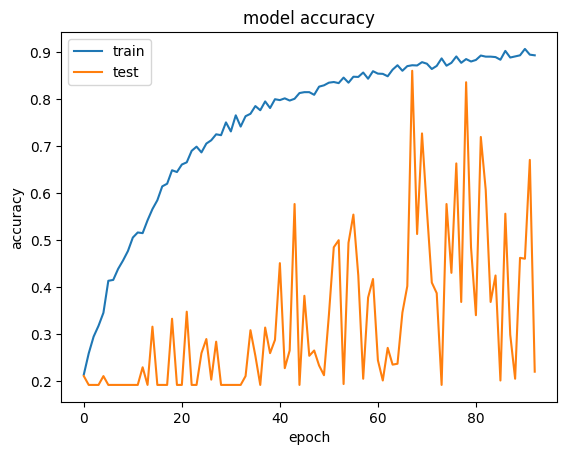

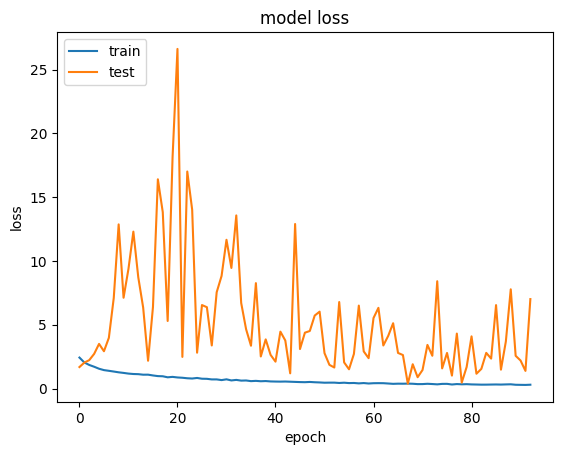

selu
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_63 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                 

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 g2D)                                                            
                                                                 
 batch_normalization_65 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 batch_normalization_66 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_9

67/67 [==============================] - 8s 127ms/step - loss: 0.8281 - accuracy: 0.6776 - val_loss: 2.5795 - val_accuracy: 0.3553
Epoch 21/100
67/67 [==============================] - ETA: 0s - loss: 0.8373 - accuracy: 0.6786
Epoch 21: val_accuracy did not improve from 0.38722
67/67 [==============================] - 9s 127ms/step - loss: 0.8373 - accuracy: 0.6786 - val_loss: 3.0649 - val_accuracy: 0.2744
Epoch 22/100
67/67 [==============================] - ETA: 0s - loss: 0.8021 - accuracy: 0.6847
Epoch 22: val_accuracy did not improve from 0.38722
67/67 [==============================] - 6s 95ms/step - loss: 0.8021 - accuracy: 0.6847 - val_loss: 11.8789 - val_accuracy: 0.1917
Epoch 23/100
67/67 [==============================] - ETA: 0s - loss: 0.7616 - accuracy: 0.7138
Epoch 23: val_accuracy improved from 0.38722 to 0.39662, saving model to model_64_selu_max.hdf5
67/67 [==============================] - 8s 125ms/step - loss: 0.7616 - accuracy: 0.7138 - val_loss: 2.6855 - val_accur

67/67 [==============================] - 6s 91ms/step - loss: 0.5337 - accuracy: 0.8036 - val_loss: 2.3344 - val_accuracy: 0.4267
Epoch 50/100
67/67 [==============================] - ETA: 0s - loss: 0.5132 - accuracy: 0.8134
Epoch 50: val_accuracy did not improve from 0.69925
67/67 [==============================] - 8s 124ms/step - loss: 0.5132 - accuracy: 0.8134 - val_loss: 1.4452 - val_accuracy: 0.5639
Epoch 51/100
67/67 [==============================] - ETA: 0s - loss: 0.5171 - accuracy: 0.8106
Epoch 51: val_accuracy did not improve from 0.69925
67/67 [==============================] - 6s 89ms/step - loss: 0.5171 - accuracy: 0.8106 - val_loss: 2.8962 - val_accuracy: 0.3571
Epoch 52/100
67/67 [==============================] - ETA: 0s - loss: 0.4804 - accuracy: 0.8153
Epoch 52: val_accuracy did not improve from 0.69925
67/67 [==============================] - 8s 119ms/step - loss: 0.4804 - accuracy: 0.8153 - val_loss: 3.6311 - val_accuracy: 0.3139
Epoch 53/100
67/67 [==============

Epoch 79/100
67/67 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8849
Epoch 79: val_accuracy did not improve from 0.81015
67/67 [==============================] - 6s 88ms/step - loss: 0.3437 - accuracy: 0.8849 - val_loss: 1.9607 - val_accuracy: 0.4511
Epoch 80/100
67/67 [==============================] - ETA: 0s - loss: 0.3471 - accuracy: 0.8755
Epoch 80: val_accuracy did not improve from 0.81015
67/67 [==============================] - 6s 88ms/step - loss: 0.3471 - accuracy: 0.8755 - val_loss: 0.6514 - val_accuracy: 0.8045
Epoch 81/100
67/67 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8820
Epoch 81: val_accuracy did not improve from 0.81015
67/67 [==============================] - 6s 88ms/step - loss: 0.3295 - accuracy: 0.8820 - val_loss: 1.2644 - val_accuracy: 0.6560
Epoch 82/100
67/67 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8633
Epoch 82: val_accuracy did not improve from 0.81015
67/67 [===========

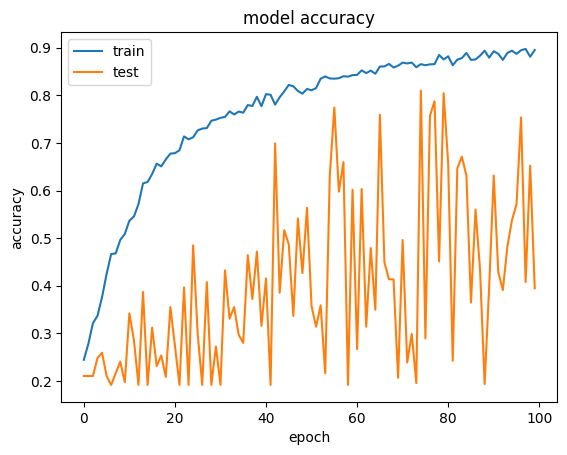

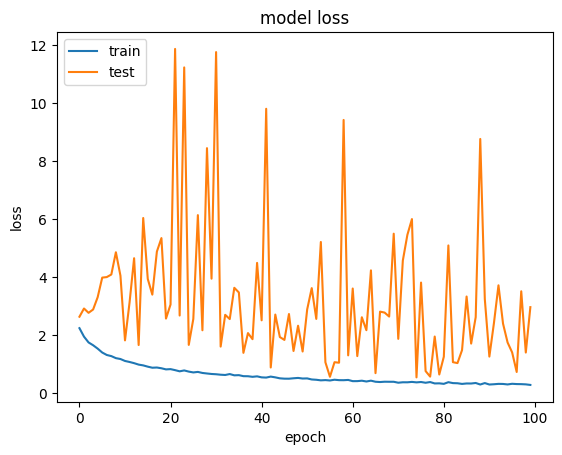

LeakyReLU
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_70 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                           

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 batch_normalization_76 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 5)                 325       
                                                                 
Total params: 396,613
Trainable params: 394,437
Non-trainable params: 2,176
_________________________________________________________________
Epoch 1/100
67/67 [==============================] - ETA: 0s - loss: 2.3345 - accuracy: 0.2354
Epoch 1: val_accuracy improved from -inf to 0.19173, saving model to model_64_LeakyReLU_max.hdf5
67/67 [==============================] - 10s 95ms/step - loss: 2.3345 - accuracy: 0.2354 - val_loss: 1.6846 - val_accuracy: 0.1917
Epoch 2

Epoch 27/100
67/67 [==============================] - ETA: 0s - loss: 0.6601 - accuracy: 0.7434
Epoch 27: val_accuracy did not improve from 0.61654
67/67 [==============================] - 6s 95ms/step - loss: 0.6601 - accuracy: 0.7434 - val_loss: 10.2941 - val_accuracy: 0.2256
Epoch 28/100
67/67 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.7458
Epoch 28: val_accuracy did not improve from 0.61654
67/67 [==============================] - 6s 93ms/step - loss: 0.6703 - accuracy: 0.7458 - val_loss: 3.8664 - val_accuracy: 0.3402
Epoch 29/100
67/67 [==============================] - ETA: 0s - loss: 0.6124 - accuracy: 0.7660
Epoch 29: val_accuracy did not improve from 0.61654
67/67 [==============================] - 6s 91ms/step - loss: 0.6124 - accuracy: 0.7660 - val_loss: 2.3629 - val_accuracy: 0.4248
Epoch 30/100
67/67 [==============================] - ETA: 0s - loss: 0.6202 - accuracy: 0.7744
Epoch 30: val_accuracy improved from 0.61654 to 0.77444, saving model

67/67 [==============================] - ETA: 0s - loss: 0.4429 - accuracy: 0.8421
Epoch 56: val_accuracy did not improve from 0.86654
67/67 [==============================] - 6s 94ms/step - loss: 0.4429 - accuracy: 0.8421 - val_loss: 7.0904 - val_accuracy: 0.2124
Epoch 57/100
67/67 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8492
Epoch 57: val_accuracy did not improve from 0.86654
67/67 [==============================] - 6s 91ms/step - loss: 0.4160 - accuracy: 0.8492 - val_loss: 1.4275 - val_accuracy: 0.5827
Epoch 58/100
67/67 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8529
Epoch 58: val_accuracy did not improve from 0.86654
67/67 [==============================] - 6s 92ms/step - loss: 0.4096 - accuracy: 0.8529 - val_loss: 0.6458 - val_accuracy: 0.7895
Epoch 59/100
67/67 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.8680
Epoch 59: val_accuracy did not improve from 0.86654
67/67 [========================

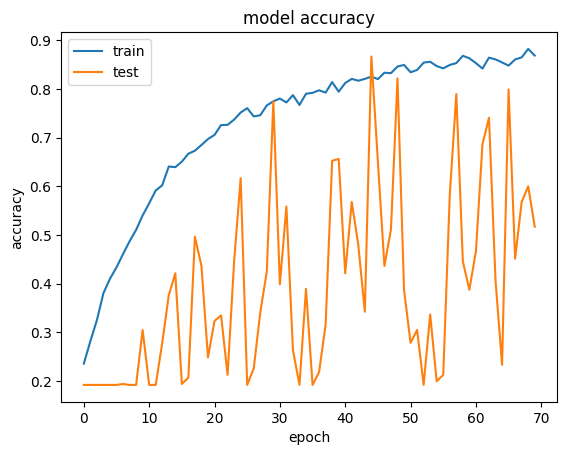

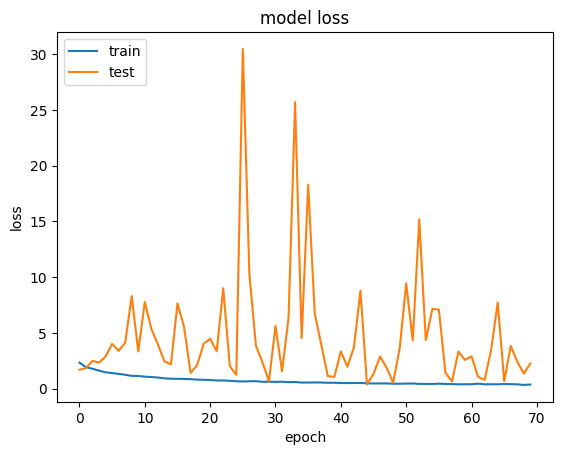

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [43]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',100)
    

In [44]:
# now = datetime.now
# t= now()
# t

In [46]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,64,max,100,0.859023
1,elu,64,max,100,0.919173
2,gelu,64,max,100,0.860902
3,selu,64,max,100,0.810150
4,LeakyReLU,64,max,100,0.866541


### Finding best activation function with average pooling

relu
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_77 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                

67/67 [==============================] - 6s 83ms/step - loss: 1.1229 - accuracy: 0.5310 - val_loss: 4.8086 - val_accuracy: 0.1936
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 1.1356 - accuracy: 0.5127
Epoch 16: val_accuracy improved from 0.22744 to 0.23120, saving model to model_64_relu_average.hdf5
67/67 [==============================] - 6s 93ms/step - loss: 1.1356 - accuracy: 0.5127 - val_loss: 6.5447 - val_accuracy: 0.2312
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 1.1166 - accuracy: 0.5310
Epoch 17: val_accuracy improved from 0.23120 to 0.41353, saving model to model_64_relu_average.hdf5
67/67 [==============================] - 7s 97ms/step - loss: 1.1166 - accuracy: 0.5310 - val_loss: 1.4400 - val_accuracy: 0.4135
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 1.0513 - accuracy: 0.5540
Epoch 18: val_accuracy did not improve from 0.41353
67/67 [==============================] - 6s 82ms/step - loss: 1.0513 -

Epoch 44/100
67/67 [==============================] - ETA: 0s - loss: 0.5957 - accuracy: 0.7829
Epoch 44: val_accuracy did not improve from 0.60902
67/67 [==============================] - 6s 91ms/step - loss: 0.5957 - accuracy: 0.7829 - val_loss: 2.0988 - val_accuracy: 0.4135
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.7777
Epoch 45: val_accuracy did not improve from 0.60902
67/67 [==============================] - 7s 96ms/step - loss: 0.5924 - accuracy: 0.7777 - val_loss: 1.2826 - val_accuracy: 0.5602
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.5584 - accuracy: 0.7965
Epoch 46: val_accuracy did not improve from 0.60902
67/67 [==============================] - 6s 93ms/step - loss: 0.5584 - accuracy: 0.7965 - val_loss: 14.9536 - val_accuracy: 0.1917
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.6441 - accuracy: 0.7716
Epoch 47: val_accuracy did not improve from 0.60902
67/67 [==========

67/67 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.8567
Epoch 73: val_accuracy did not improve from 0.66541
Restoring model weights from the end of the best epoch: 48.
67/67 [==============================] - 6s 83ms/step - loss: 0.4163 - accuracy: 0.8567 - val_loss: 3.9346 - val_accuracy: 0.2688
Epoch 73: early stopping
Training time: 0:07:25.550739
Test score: 0.9336842894554138
Test accuracy: 0.6654135584831238
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


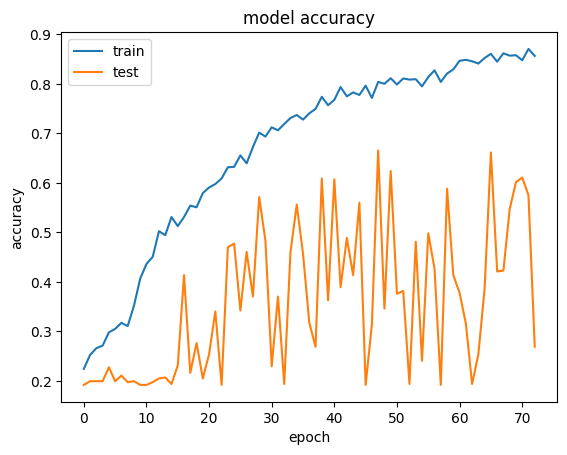

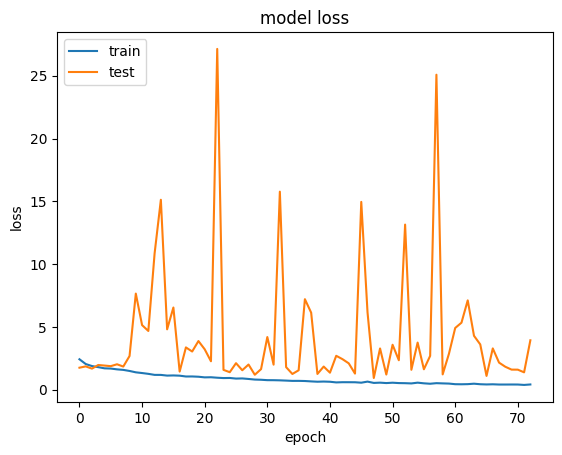

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


elu
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 31, 31, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_84 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                 

Epoch 15/100
67/67 [==============================] - ETA: 0s - loss: 1.1427 - accuracy: 0.5127
Epoch 15: val_accuracy did not improve from 0.26880
67/67 [==============================] - 7s 100ms/step - loss: 1.1427 - accuracy: 0.5127 - val_loss: 7.8970 - val_accuracy: 0.2086
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 1.1171 - accuracy: 0.5122
Epoch 16: val_accuracy did not improve from 0.26880
67/67 [==============================] - 6s 95ms/step - loss: 1.1171 - accuracy: 0.5122 - val_loss: 5.0594 - val_accuracy: 0.2650
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 1.1102 - accuracy: 0.5183
Epoch 17: val_accuracy improved from 0.26880 to 0.51880, saving model to model_64_elu_average.hdf5
67/67 [==============================] - 7s 100ms/step - loss: 1.1102 - accuracy: 0.5183 - val_loss: 1.1375 - val_accuracy: 0.5188
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 1.1009 - accuracy: 0.5381
Epoch 18: val_accurac

67/67 [==============================] - ETA: 0s - loss: 0.7509 - accuracy: 0.7115
Epoch 44: val_accuracy did not improve from 0.60150
67/67 [==============================] - 6s 92ms/step - loss: 0.7509 - accuracy: 0.7115 - val_loss: 1.7900 - val_accuracy: 0.4831
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.7279 - accuracy: 0.7270
Epoch 45: val_accuracy did not improve from 0.60150
67/67 [==============================] - 6s 90ms/step - loss: 0.7279 - accuracy: 0.7270 - val_loss: 6.5057 - val_accuracy: 0.2143
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.7265 - accuracy: 0.7223
Epoch 46: val_accuracy improved from 0.60150 to 0.62218, saving model to model_64_elu_average.hdf5
67/67 [==============================] - 7s 97ms/step - loss: 0.7265 - accuracy: 0.7223 - val_loss: 1.1567 - val_accuracy: 0.6222
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.7378
Epoch 47: val_accuracy did not impro

67/67 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.8454
Epoch 73: val_accuracy improved from 0.71429 to 0.81203, saving model to model_64_elu_average.hdf5
67/67 [==============================] - 5s 79ms/step - loss: 0.4327 - accuracy: 0.8454 - val_loss: 0.5172 - val_accuracy: 0.8120
Epoch 74/100
67/67 [==============================] - ETA: 0s - loss: 0.4630 - accuracy: 0.8318
Epoch 74: val_accuracy did not improve from 0.81203
67/67 [==============================] - 5s 76ms/step - loss: 0.4630 - accuracy: 0.8318 - val_loss: 1.0326 - val_accuracy: 0.6203
Epoch 75/100
67/67 [==============================] - ETA: 0s - loss: 0.4733 - accuracy: 0.8327
Epoch 75: val_accuracy did not improve from 0.81203
67/67 [==============================] - 5s 80ms/step - loss: 0.4733 - accuracy: 0.8327 - val_loss: 3.6587 - val_accuracy: 0.3289
Epoch 76/100
67/67 [==============================] - ETA: 0s - loss: 0.4754 - accuracy: 0.8327
Epoch 76: val_accuracy did not impro

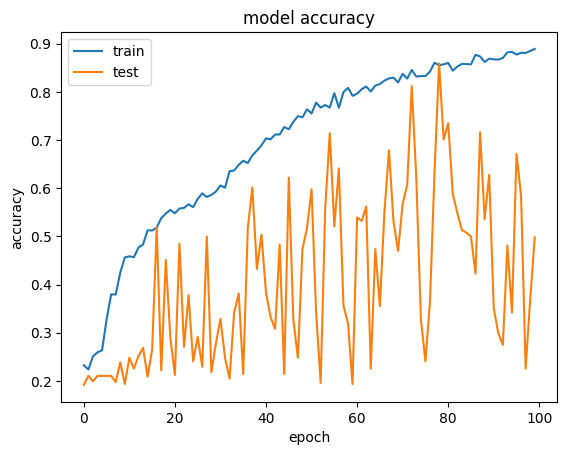

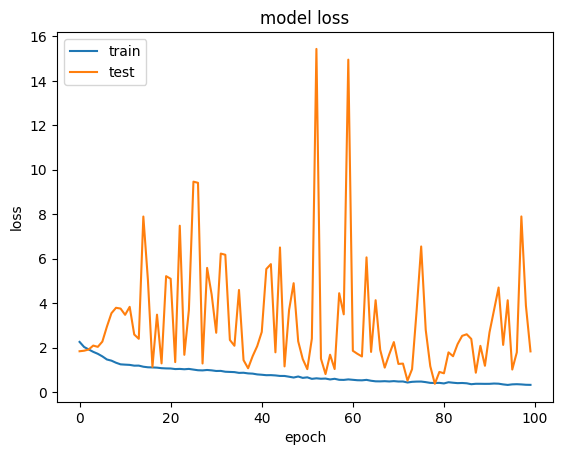

gelu
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 31, 31, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_91 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 gePooling2D)                                                    
                                                                 
 dropout_26 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 batch_normalization_94 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_13 (Flatten)        (None, 256)               0         
                                                                 
 dense_52 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_95 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
          

67/67 [==============================] - ETA: 0s - loss: 1.1328 - accuracy: 0.5000
Epoch 22: val_accuracy did not improve from 0.39474
67/67 [==============================] - 7s 109ms/step - loss: 1.1328 - accuracy: 0.5000 - val_loss: 3.5212 - val_accuracy: 0.2350
Epoch 23/100
67/67 [==============================] - ETA: 0s - loss: 1.1203 - accuracy: 0.5047
Epoch 23: val_accuracy did not improve from 0.39474
67/67 [==============================] - 7s 110ms/step - loss: 1.1203 - accuracy: 0.5047 - val_loss: 2.4514 - val_accuracy: 0.2481
Epoch 24/100
67/67 [==============================] - ETA: 0s - loss: 1.1096 - accuracy: 0.5287
Epoch 24: val_accuracy did not improve from 0.39474
67/67 [==============================] - 7s 109ms/step - loss: 1.1096 - accuracy: 0.5287 - val_loss: 3.4389 - val_accuracy: 0.2105
Epoch 25/100
67/67 [==============================] - ETA: 0s - loss: 1.1132 - accuracy: 0.5343
Epoch 25: val_accuracy did not improve from 0.39474
67/67 [=====================

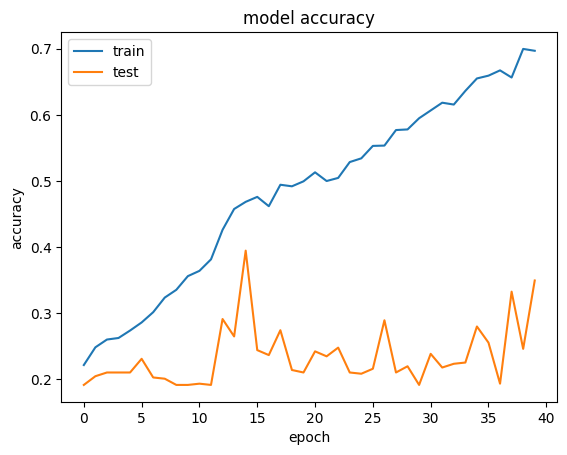

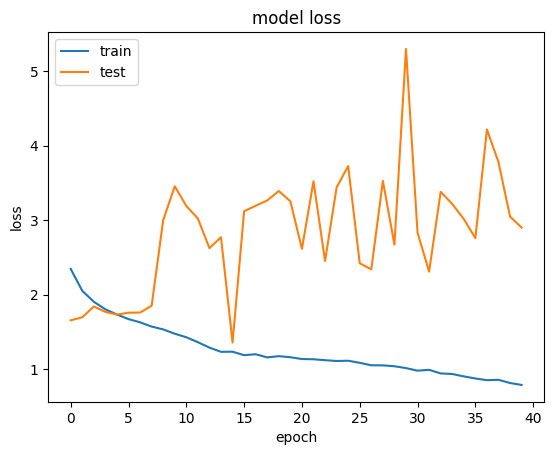

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


selu
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 average_pooling2d_12 (Avera  (None, 31, 31, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_98 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 average_pooling2d_13 (Avera  (None, 14, 14, 64)       0         
 gePooling2D)                                                    
                                                

67/67 [==============================] - ETA: 0s - loss: 1.1927 - accuracy: 0.4638
Epoch 15: val_accuracy did not improve from 0.32519
67/67 [==============================] - 5s 80ms/step - loss: 1.1927 - accuracy: 0.4638 - val_loss: 12.0709 - val_accuracy: 0.2068
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 1.1778 - accuracy: 0.4671
Epoch 16: val_accuracy did not improve from 0.32519
67/67 [==============================] - 5s 80ms/step - loss: 1.1778 - accuracy: 0.4671 - val_loss: 6.1089 - val_accuracy: 0.2068
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 1.1971 - accuracy: 0.4760
Epoch 17: val_accuracy improved from 0.32519 to 0.33271, saving model to model_64_selu_average.hdf5
67/67 [==============================] - 8s 121ms/step - loss: 1.1971 - accuracy: 0.4760 - val_loss: 1.8110 - val_accuracy: 0.3327
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 1.1891 - accuracy: 0.4690
Epoch 18: val_accuracy did not im

Epoch 44/100
67/67 [==============================] - ETA: 0s - loss: 0.8614 - accuracy: 0.6640
Epoch 44: val_accuracy did not improve from 0.40602
67/67 [==============================] - 6s 90ms/step - loss: 0.8614 - accuracy: 0.6640 - val_loss: 4.8684 - val_accuracy: 0.2368
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.8560 - accuracy: 0.6602
Epoch 45: val_accuracy did not improve from 0.40602
67/67 [==============================] - 6s 89ms/step - loss: 0.8560 - accuracy: 0.6602 - val_loss: 3.1835 - val_accuracy: 0.2820
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.8499 - accuracy: 0.6743
Epoch 46: val_accuracy did not improve from 0.40602
67/67 [==============================] - 6s 84ms/step - loss: 0.8499 - accuracy: 0.6743 - val_loss: 4.2036 - val_accuracy: 0.2556
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.8418 - accuracy: 0.6715
Epoch 47: val_accuracy did not improve from 0.40602
67/67 [===========

Epoch 73/100
67/67 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.7556
Epoch 73: val_accuracy did not improve from 0.64850
67/67 [==============================] - 6s 84ms/step - loss: 0.6396 - accuracy: 0.7556 - val_loss: 3.9513 - val_accuracy: 0.2350
Epoch 74/100
67/67 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.7650
Epoch 74: val_accuracy did not improve from 0.64850
67/67 [==============================] - 6s 91ms/step - loss: 0.6072 - accuracy: 0.7650 - val_loss: 11.7960 - val_accuracy: 0.3026
Epoch 75/100
67/67 [==============================] - ETA: 0s - loss: 0.5976 - accuracy: 0.7730
Epoch 75: val_accuracy did not improve from 0.64850
67/67 [==============================] - 6s 89ms/step - loss: 0.5976 - accuracy: 0.7730 - val_loss: 2.8190 - val_accuracy: 0.3722
Epoch 76/100
67/67 [==============================] - ETA: 0s - loss: 0.5855 - accuracy: 0.7768
Epoch 76: val_accuracy did not improve from 0.64850
67/67 [==========

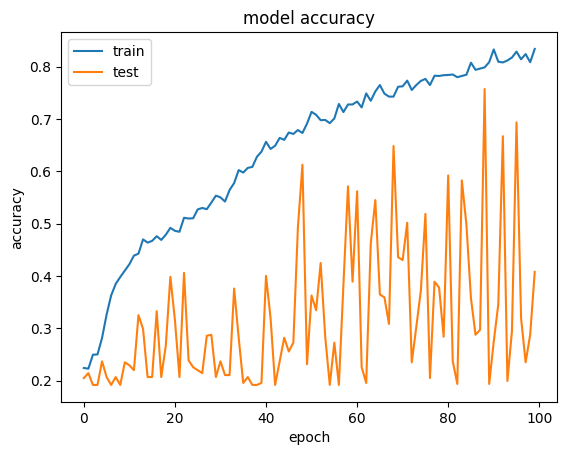

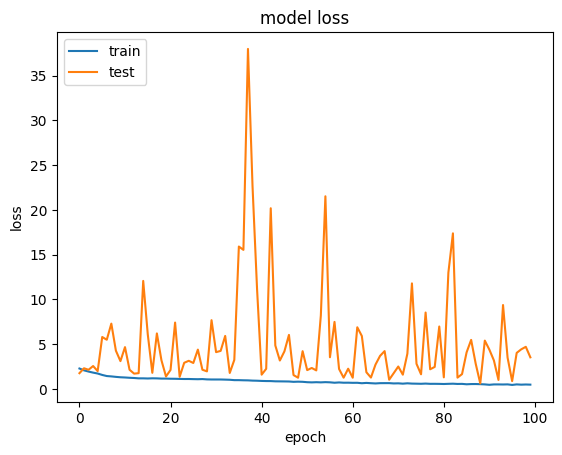

LeakyReLU
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 average_pooling2d_16 (Avera  (None, 31, 31, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_105 (Ba  (None, 31, 31, 64)       256       
 tchNormalization)                                               


<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 conv2d_61 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 average_pooling2d_17 (Avera  (None, 14, 14, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_106 (Ba  (None, 14, 14, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_62 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 average_pooling2d_18 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_107 (Ba  (None, 6, 6, 64)         256       
 tchNormal

Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 1.0771 - accuracy: 0.5428
Epoch 18: val_accuracy did not improve from 0.27632
67/67 [==============================] - 5s 78ms/step - loss: 1.0771 - accuracy: 0.5428 - val_loss: 5.4069 - val_accuracy: 0.2726
Epoch 19/100
67/67 [==============================] - ETA: 0s - loss: 1.0947 - accuracy: 0.5395
Epoch 19: val_accuracy did not improve from 0.27632
67/67 [==============================] - 6s 88ms/step - loss: 1.0947 - accuracy: 0.5395 - val_loss: 6.4923 - val_accuracy: 0.2162
Epoch 20/100
67/67 [==============================] - ETA: 0s - loss: 1.0671 - accuracy: 0.5461
Epoch 20: val_accuracy did not improve from 0.27632
67/67 [==============================] - 6s 92ms/step - loss: 1.0671 - accuracy: 0.5461 - val_loss: 5.0951 - val_accuracy: 0.2331
Epoch 21/100
67/67 [==============================] - ETA: 0s - loss: 1.0650 - accuracy: 0.5442
Epoch 21: val_accuracy did not improve from 0.27632
67/67 [===========

67/67 [==============================] - 6s 95ms/step - loss: 0.7904 - accuracy: 0.7002 - val_loss: 26.4745 - val_accuracy: 0.1917
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.8034 - accuracy: 0.6898
Epoch 47: val_accuracy did not improve from 0.44361
67/67 [==============================] - 6s 82ms/step - loss: 0.8034 - accuracy: 0.6898 - val_loss: 3.7980 - val_accuracy: 0.2519
Epoch 48/100
67/67 [==============================] - ETA: 0s - loss: 0.8230 - accuracy: 0.6767
Epoch 48: val_accuracy did not improve from 0.44361
67/67 [==============================] - 6s 82ms/step - loss: 0.8230 - accuracy: 0.6767 - val_loss: 5.5599 - val_accuracy: 0.3553
Epoch 49/100
67/67 [==============================] - ETA: 0s - loss: 0.7744 - accuracy: 0.6941
Epoch 49: val_accuracy did not improve from 0.44361
67/67 [==============================] - 6s 87ms/step - loss: 0.7744 - accuracy: 0.6941 - val_loss: 36.1837 - val_accuracy: 0.1917
Epoch 50/100
67/67 [==============

Epoch 76/100
67/67 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.7439
Epoch 76: val_accuracy did not improve from 0.47368
67/67 [==============================] - 6s 87ms/step - loss: 0.6650 - accuracy: 0.7439 - val_loss: 9.3436 - val_accuracy: 0.1992
Epoch 77/100
67/67 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.7542
Epoch 77: val_accuracy did not improve from 0.47368
67/67 [==============================] - 6s 88ms/step - loss: 0.6291 - accuracy: 0.7542 - val_loss: 21.3555 - val_accuracy: 0.1917
Epoch 78/100
67/67 [==============================] - ETA: 0s - loss: 0.6271 - accuracy: 0.7589
Epoch 78: val_accuracy did not improve from 0.47368
67/67 [==============================] - 6s 87ms/step - loss: 0.6271 - accuracy: 0.7589 - val_loss: 9.7211 - val_accuracy: 0.1992
Epoch 79/100
67/67 [==============================] - ETA: 0s - loss: 0.6502 - accuracy: 0.7472
Epoch 79: val_accuracy did not improve from 0.47368
67/67 [==========

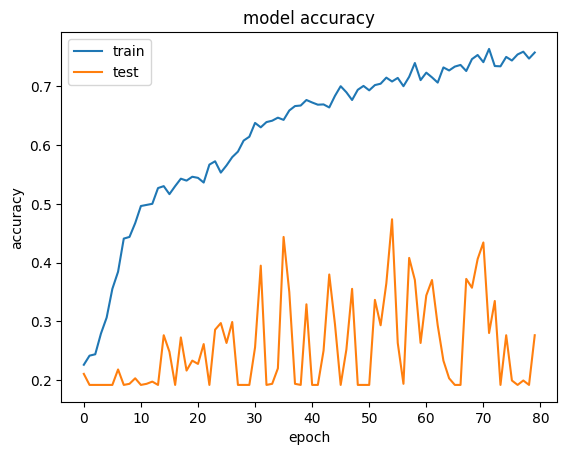

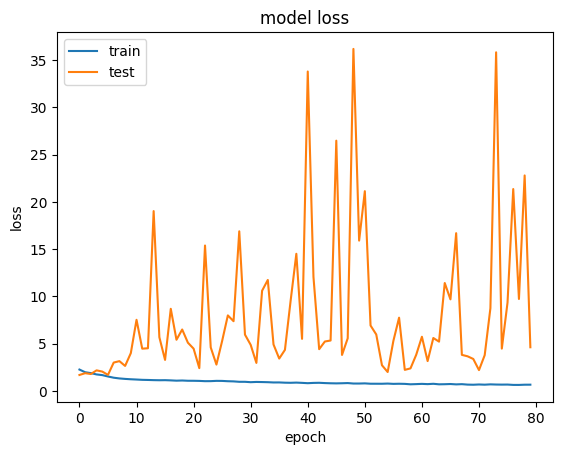

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [47]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',100)

In [48]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,64,max,100,0.859023
1,elu,64,max,100,0.919173
2,gelu,64,max,100,0.860902
3,selu,64,max,100,0.810150
4,LeakyReLU,64,max,100,0.866541
5,relu,64,average,100,0.665414
6,elu,64,average,100,0.859023
7,gelu,64,average,100,0.394737
8,selu,64,average,100,0.757519
9,LeakyReLU,64,average,100,0.473684


## Conclusion regarding the performance of Activation function

seeing all the results ELU seems to give the best results for both types of poolings

## Conclusion regarding the performance of pooling techniques

Max pooling gives the best results

## The best activation function is 'ELU'   and the best pooling technique is 'Maxpooling'  

## Finding the effect of number of filters on our best activation and pooling model

16
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_112 (Ba  (None, 31, 31, 16)       64        
 tchNormalization)                                               
                                                                 
 conv2d_65 (Conv2D)          (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                  

67/67 [==============================] - ETA: 0s - loss: 1.1888 - accuracy: 0.5033
Epoch 15: val_accuracy did not improve from 0.47744
67/67 [==============================] - 3s 50ms/step - loss: 1.1888 - accuracy: 0.5033 - val_loss: 3.9458 - val_accuracy: 0.1917
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 1.1708 - accuracy: 0.4930
Epoch 16: val_accuracy did not improve from 0.47744
67/67 [==============================] - 3s 49ms/step - loss: 1.1708 - accuracy: 0.4930 - val_loss: 3.0079 - val_accuracy: 0.2876
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 1.1313 - accuracy: 0.5193
Epoch 17: val_accuracy did not improve from 0.47744
67/67 [==============================] - 3s 49ms/step - loss: 1.1313 - accuracy: 0.5193 - val_loss: 6.5466 - val_accuracy: 0.2331
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 1.1355 - accuracy: 0.5310
Epoch 18: val_accuracy did not improve from 0.47744
67/67 [========================

67/67 [==============================] - ETA: 0s - loss: 0.7915 - accuracy: 0.7007
Epoch 44: val_accuracy did not improve from 0.60902
67/67 [==============================] - 3s 51ms/step - loss: 0.7915 - accuracy: 0.7007 - val_loss: 3.1621 - val_accuracy: 0.3064
Epoch 45/100
66/67 [============================>.] - ETA: 0s - loss: 0.7720 - accuracy: 0.7071
Epoch 45: val_accuracy did not improve from 0.60902
67/67 [==============================] - 3s 49ms/step - loss: 0.7719 - accuracy: 0.7077 - val_loss: 4.9188 - val_accuracy: 0.2650
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.8065 - accuracy: 0.6927
Epoch 46: val_accuracy did not improve from 0.60902
67/67 [==============================] - 3s 51ms/step - loss: 0.8065 - accuracy: 0.6927 - val_loss: 2.5718 - val_accuracy: 0.3233
Epoch 47/100
66/67 [============================>.] - ETA: 0s - loss: 0.7695 - accuracy: 0.7013
Epoch 47: val_accuracy did not improve from 0.60902
67/67 [========================

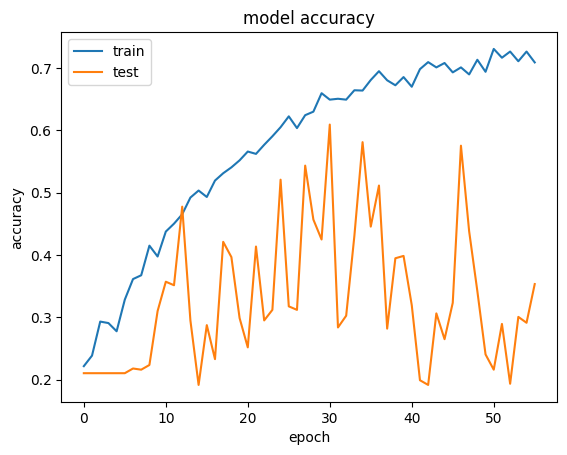

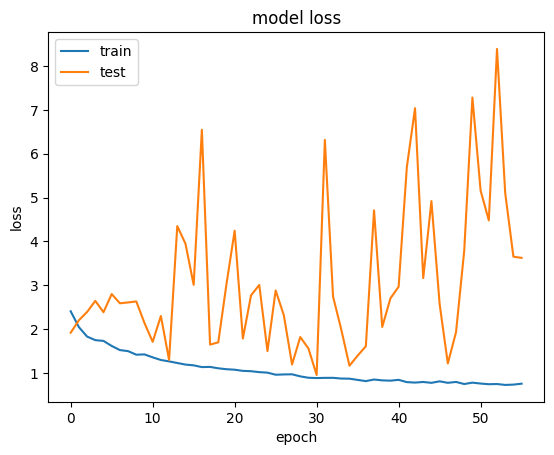

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


32
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_119 (Ba  (None, 31, 31, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_69 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                  

67/67 [==============================] - 4s 66ms/step - loss: 1.0588 - accuracy: 0.5761 - val_loss: 4.3519 - val_accuracy: 0.2857
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 1.0213 - accuracy: 0.5893
Epoch 16: val_accuracy improved from 0.51128 to 0.54887, saving model to model_32_elu_max.hdf5
67/67 [==============================] - 5s 69ms/step - loss: 1.0213 - accuracy: 0.5893 - val_loss: 1.2308 - val_accuracy: 0.5489
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 1.0080 - accuracy: 0.5959
Epoch 17: val_accuracy did not improve from 0.54887
67/67 [==============================] - 4s 61ms/step - loss: 1.0080 - accuracy: 0.5959 - val_loss: 6.2644 - val_accuracy: 0.2068
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 0.9618 - accuracy: 0.6273
Epoch 18: val_accuracy did not improve from 0.54887
67/67 [==============================] - 4s 65ms/step - loss: 0.9618 - accuracy: 0.6273 - val_loss: 6.9085 - val_accuracy: 

Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.7674
Epoch 45: val_accuracy did not improve from 0.66729
67/67 [==============================] - 4s 64ms/step - loss: 0.6215 - accuracy: 0.7674 - val_loss: 2.6811 - val_accuracy: 0.4643
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.5618 - accuracy: 0.7810
Epoch 46: val_accuracy did not improve from 0.66729
67/67 [==============================] - 5s 67ms/step - loss: 0.5618 - accuracy: 0.7810 - val_loss: 2.3052 - val_accuracy: 0.4248
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.7829
Epoch 47: val_accuracy did not improve from 0.66729
67/67 [==============================] - 4s 62ms/step - loss: 0.5877 - accuracy: 0.7829 - val_loss: 1.4627 - val_accuracy: 0.6053
Epoch 48/100
67/67 [==============================] - ETA: 0s - loss: 0.6108 - accuracy: 0.7801
Epoch 48: val_accuracy did not improve from 0.66729
67/67 [===========

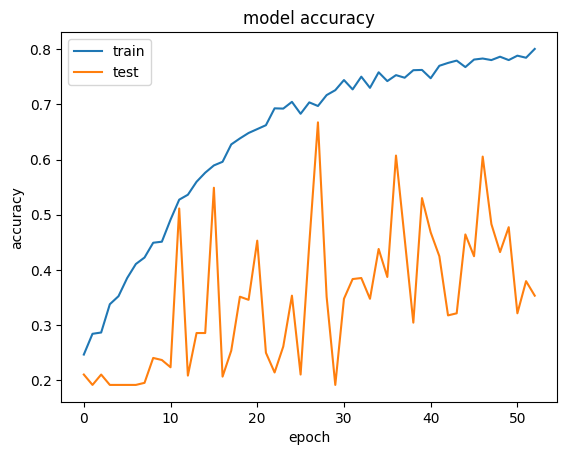

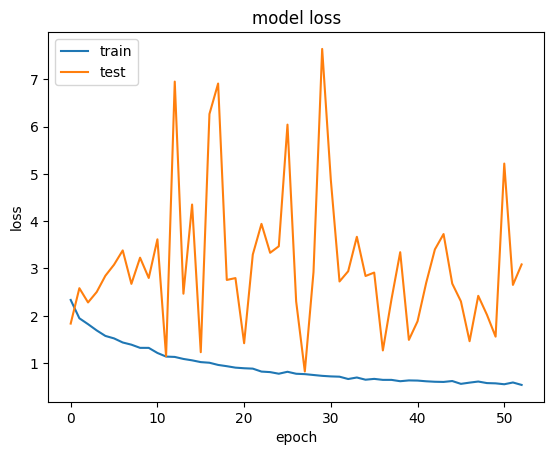

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


64
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_126 (Ba  (None, 31, 31, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_73 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                  

67/67 [==============================] - ETA: 0s - loss: 1.0472 - accuracy: 0.5714
Epoch 15: val_accuracy did not improve from 0.31203
67/67 [==============================] - 7s 99ms/step - loss: 1.0472 - accuracy: 0.5714 - val_loss: 3.5140 - val_accuracy: 0.2049
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 0.9970 - accuracy: 0.5851
Epoch 16: val_accuracy improved from 0.31203 to 0.33271, saving model to model_64_elu_max.hdf5
67/67 [==============================] - 6s 96ms/step - loss: 0.9970 - accuracy: 0.5851 - val_loss: 1.7318 - val_accuracy: 0.3327
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 0.9771 - accuracy: 0.6128
Epoch 17: val_accuracy did not improve from 0.33271
67/67 [==============================] - 6s 91ms/step - loss: 0.9771 - accuracy: 0.6128 - val_loss: 3.2519 - val_accuracy: 0.2425
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 0.9636 - accuracy: 0.6010
Epoch 18: val_accuracy did not improve f

Epoch 44/100
67/67 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.7970
Epoch 44: val_accuracy did not improve from 0.66729
67/67 [==============================] - 6s 91ms/step - loss: 0.5350 - accuracy: 0.7970 - val_loss: 3.3467 - val_accuracy: 0.3665
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.8158
Epoch 45: val_accuracy did not improve from 0.66729
67/67 [==============================] - 6s 91ms/step - loss: 0.5035 - accuracy: 0.8158 - val_loss: 3.4074 - val_accuracy: 0.3139
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.8257
Epoch 46: val_accuracy did not improve from 0.66729
67/67 [==============================] - 7s 102ms/step - loss: 0.4861 - accuracy: 0.8257 - val_loss: 1.3836 - val_accuracy: 0.5038
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.8158
Epoch 47: val_accuracy did not improve from 0.66729
67/67 [==========

Epoch 73/100
67/67 [==============================] - ETA: 0s - loss: 0.3625 - accuracy: 0.8783
Epoch 73: val_accuracy did not improve from 0.87406
67/67 [==============================] - 6s 94ms/step - loss: 0.3625 - accuracy: 0.8783 - val_loss: 0.3680 - val_accuracy: 0.8459
Epoch 74/100
67/67 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.8900
Epoch 74: val_accuracy did not improve from 0.87406
67/67 [==============================] - 6s 92ms/step - loss: 0.3232 - accuracy: 0.8900 - val_loss: 1.9500 - val_accuracy: 0.5244
Epoch 75/100
67/67 [==============================] - ETA: 0s - loss: 0.3276 - accuracy: 0.8858
Epoch 75: val_accuracy did not improve from 0.87406
67/67 [==============================] - 6s 92ms/step - loss: 0.3276 - accuracy: 0.8858 - val_loss: 0.6094 - val_accuracy: 0.8139
Epoch 76/100
67/67 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8825
Epoch 76: val_accuracy did not improve from 0.87406
67/67 [===========

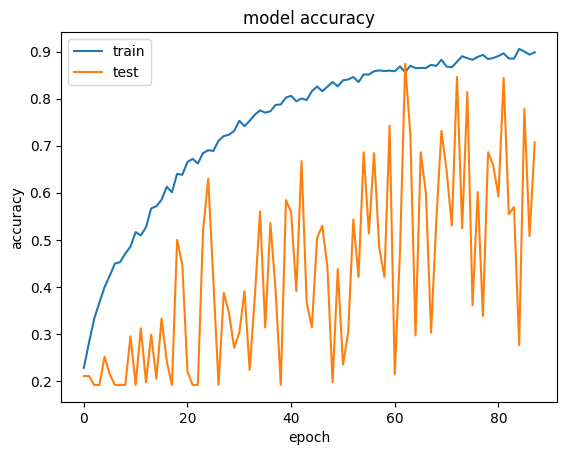

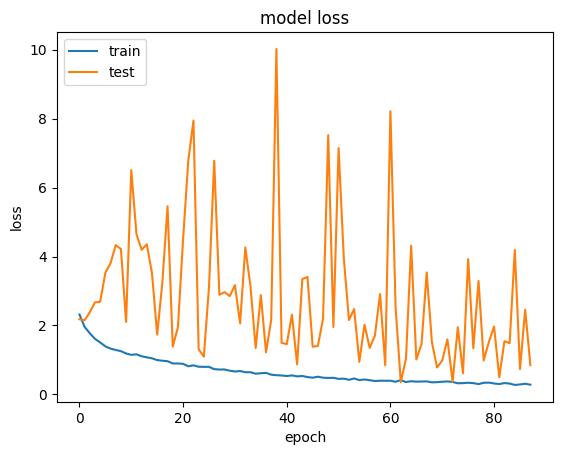

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


128
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_133 (Ba  (None, 31, 31, 128)      512       
 tchNormalization)                                               
                                                                 
 conv2d_77 (Conv2D)          (None, 29, 29, 128)       147584    
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                 

67/67 [==============================] - ETA: 0s - loss: 0.8922 - accuracy: 0.6466
Epoch 15: val_accuracy did not improve from 0.45113
67/67 [==============================] - 13s 189ms/step - loss: 0.8922 - accuracy: 0.6466 - val_loss: 2.6672 - val_accuracy: 0.3590
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 0.8316 - accuracy: 0.6743
Epoch 16: val_accuracy did not improve from 0.45113
67/67 [==============================] - 11s 165ms/step - loss: 0.8316 - accuracy: 0.6743 - val_loss: 1.8143 - val_accuracy: 0.3741
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 0.8258 - accuracy: 0.6800
Epoch 17: val_accuracy did not improve from 0.45113
67/67 [==============================] - 11s 164ms/step - loss: 0.8258 - accuracy: 0.6800 - val_loss: 6.1357 - val_accuracy: 0.2086
Epoch 18/100
67/67 [==============================] - ETA: 0s - loss: 0.8142 - accuracy: 0.6819
Epoch 18: val_accuracy did not improve from 0.45113
67/67 [==================

Epoch 44/100
67/67 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8722
Epoch 44: val_accuracy did not improve from 0.82519
67/67 [==============================] - 14s 210ms/step - loss: 0.3671 - accuracy: 0.8722 - val_loss: 1.4667 - val_accuracy: 0.5677
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.4017 - accuracy: 0.8609
Epoch 45: val_accuracy did not improve from 0.82519
67/67 [==============================] - 12s 178ms/step - loss: 0.4017 - accuracy: 0.8609 - val_loss: 4.1660 - val_accuracy: 0.3289
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.3816 - accuracy: 0.8618
Epoch 46: val_accuracy did not improve from 0.82519
67/67 [==============================] - 11s 170ms/step - loss: 0.3816 - accuracy: 0.8618 - val_loss: 1.9228 - val_accuracy: 0.5301
Epoch 47/100
67/67 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8694
Epoch 47: val_accuracy did not improve from 0.82519
67/67 [=====

67/67 [==============================] - ETA: 0s - loss: 0.2857 - accuracy: 0.9107
Epoch 73: val_accuracy did not improve from 0.85714
67/67 [==============================] - 11s 171ms/step - loss: 0.2857 - accuracy: 0.9107 - val_loss: 1.7777 - val_accuracy: 0.6147
Epoch 74/100
67/67 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.9098
Epoch 74: val_accuracy did not improve from 0.85714
67/67 [==============================] - 11s 171ms/step - loss: 0.2657 - accuracy: 0.9098 - val_loss: 2.3101 - val_accuracy: 0.5075
Epoch 75/100
67/67 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.9149
Epoch 75: val_accuracy did not improve from 0.85714
67/67 [==============================] - 12s 176ms/step - loss: 0.2557 - accuracy: 0.9149 - val_loss: 2.7412 - val_accuracy: 0.4718
Epoch 76/100
67/67 [==============================] - ETA: 0s - loss: 0.2875 - accuracy: 0.9037
Epoch 76: val_accuracy did not improve from 0.85714
67/67 [==================

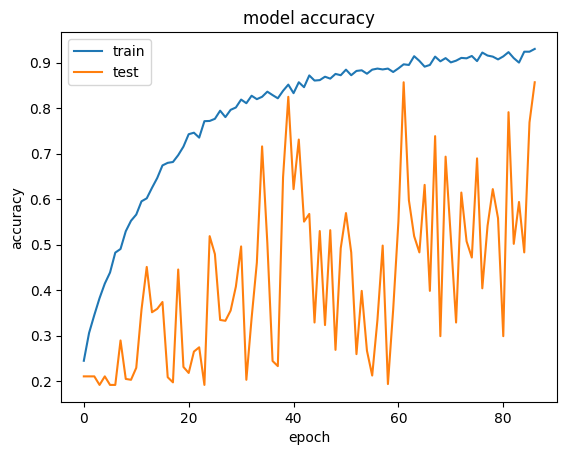

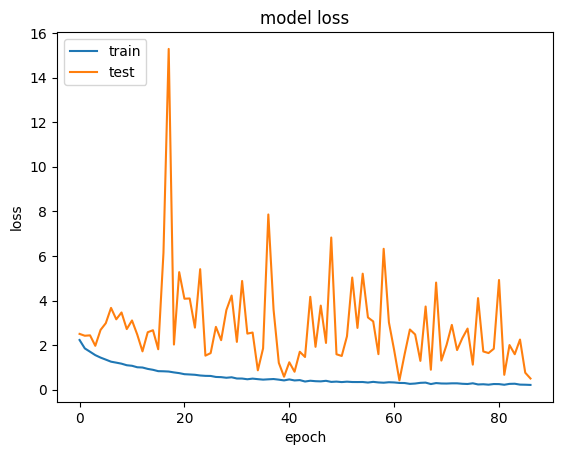

<ipython-input-40-8ae6350471e1>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [49]:
f= [16,32,64,128]

for i in f:
    print(i)
#     print(type(i))
    CNN_model(i,'elu','max',100)

In [50]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,64,max,100,0.859023
1,elu,64,max,100,0.919173
2,gelu,64,max,100,0.860902
3,selu,64,max,100,0.810150
4,LeakyReLU,64,max,100,0.866541
5,relu,64,average,100,0.665414
6,elu,64,average,100,0.859023
7,gelu,64,average,100,0.394737
8,selu,64,average,100,0.757519
9,LeakyReLU,64,average,100,0.473684


## Conculsion of the effect of number of results

From the results we can see increasing the number of filters does increase the accuaracy upto a point after that the accuracy can decrease so we need to find the optimal number of filters

## the best model is with 'elu' activation function 64 filters and maxpooling can give results from accuracy of 0.87 to 0.91

Saving results in a csv file

In [ ]:
df_results1=df_r.copy()
df_results1['dataset']='Grapevine Leaves Image Dataset'
df_results1.head()

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,relu,64,max,100,0.859023,Grapevine Leaves Image Dataset
1,elu,64,max,100,0.919173,Grapevine Leaves Image Dataset
2,gelu,64,max,100,0.860902,Grapevine Leaves Image Dataset
3,selu,64,max,100,0.810150,Grapevine Leaves Image Dataset
4,LeakyReLU,64,max,100,0.866541,Grapevine Leaves Image Dataset


In [ ]:
df_results1.to_csv('df_results1.csv',index=False)

In [ ]:
df_results1.sort_values('test_accuracy',ascending= False)

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
1,elu,64,max,100,0.919173,Grapevine Leaves Image Dataset
12,elu,64,max,100,0.874060,Grapevine Leaves Image Dataset
4,LeakyReLU,64,max,100,0.866541,Grapevine Leaves Image Dataset
2,gelu,64,max,100,0.860902,Grapevine Leaves Image Dataset
0,relu,64,max,100,0.859023,Grapevine Leaves Image Dataset
6,elu,64,average,100,0.859023,Grapevine Leaves Image Dataset
13,elu,128,max,100,0.857143,Grapevine Leaves Image Dataset
3,selu,64,max,100,0.810150,Grapevine Leaves Image Dataset
8,selu,64,average,100,0.757519,Grapevine Leaves Image Dataset
11,elu,32,max,100,0.667293,Grapevine Leaves Image Dataset


# Using imagenet winner model

## Resnet

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

67/67 [==============================] - 26s 381ms/step - loss: 0.5995 - accuracy: 0.7998 - val_loss: 3.3576 - val_accuracy: 0.1917
Epoch 12/100
67/67 [==============================] - ETA: 0s - loss: 0.4841 - accuracy: 0.8492
Epoch 12: val_accuracy did not improve from 0.21053
67/67 [==============================] - 26s 394ms/step - loss: 0.4841 - accuracy: 0.8492 - val_loss: 2.0405 - val_accuracy: 0.2105
Epoch 13/100
67/67 [==============================] - ETA: 0s - loss: 0.5402 - accuracy: 0.8271
Epoch 13: val_accuracy improved from 0.21053 to 0.23120, saving model to resnet_model.hdf5
67/67 [==============================] - 34s 504ms/step - loss: 0.5402 - accuracy: 0.8271 - val_loss: 2.1342 - val_accuracy: 0.2312
Epoch 14/100
67/67 [==============================] - ETA: 0s - loss: 0.4864 - accuracy: 0.8383
Epoch 14: val_accuracy did not improve from 0.23120
67/67 [==============================] - 24s 358ms/step - loss: 0.4864 - accuracy: 0.8383 - val_loss: 2.7051 - val_accura

67/67 [==============================] - ETA: 0s - loss: 0.2985 - accuracy: 0.9065
Epoch 40: val_accuracy did not improve from 0.79887
67/67 [==============================] - 28s 423ms/step - loss: 0.2985 - accuracy: 0.9065 - val_loss: 3.1423 - val_accuracy: 0.6485
Epoch 41/100
67/67 [==============================] - ETA: 0s - loss: 0.2841 - accuracy: 0.9159
Epoch 41: val_accuracy did not improve from 0.79887
67/67 [==============================] - 32s 473ms/step - loss: 0.2841 - accuracy: 0.9159 - val_loss: 4.1818 - val_accuracy: 0.3534
Epoch 42/100
67/67 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9164
Epoch 42: val_accuracy did not improve from 0.79887
67/67 [==============================] - 28s 420ms/step - loss: 0.2540 - accuracy: 0.9164 - val_loss: 2.4833 - val_accuracy: 0.6541
Epoch 43/100
67/67 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9422
Epoch 43: val_accuracy did not improve from 0.79887
67/67 [==================

67/67 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9507
Epoch 69: val_accuracy did not improve from 0.88346
67/67 [==============================] - 28s 412ms/step - loss: 0.1601 - accuracy: 0.9507 - val_loss: 2.0272 - val_accuracy: 0.6090
Epoch 70/100
67/67 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.9610
Epoch 70: val_accuracy did not improve from 0.88346
67/67 [==============================] - 28s 411ms/step - loss: 0.1423 - accuracy: 0.9610 - val_loss: 1.7895 - val_accuracy: 0.6974
Epoch 71/100
67/67 [==============================] - ETA: 0s - loss: 0.1797 - accuracy: 0.9478
Epoch 71: val_accuracy did not improve from 0.88346
67/67 [==============================] - 28s 412ms/step - loss: 0.1797 - accuracy: 0.9478 - val_loss: 0.8709 - val_accuracy: 0.7462
Epoch 72/100
67/67 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 0.9492
Epoch 72: val_accuracy did not improve from 0.88346
67/67 [==================

67/67 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9652
Epoch 98: val_accuracy did not improve from 0.96429
67/67 [==============================] - 24s 353ms/step - loss: 0.1174 - accuracy: 0.9652 - val_loss: 0.4876 - val_accuracy: 0.8722
Epoch 99/100
67/67 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9652
Epoch 99: val_accuracy did not improve from 0.96429
67/67 [==============================] - 25s 366ms/step - loss: 0.1035 - accuracy: 0.9652 - val_loss: 3.0718 - val_accuracy: 0.5714
Epoch 100/100
67/67 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 0.9648
Epoch 100: val_accuracy did not improve from 0.96429
67/67 [==============================] - 24s 356ms/step - loss: 0.1238 - accuracy: 0.9648 - val_loss: 5.9470 - val_accuracy: 0.3910
Training time: 0:47:21.716496
Test score: 0.09119635075330734
Test accuracy: 0.9642857313156128
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


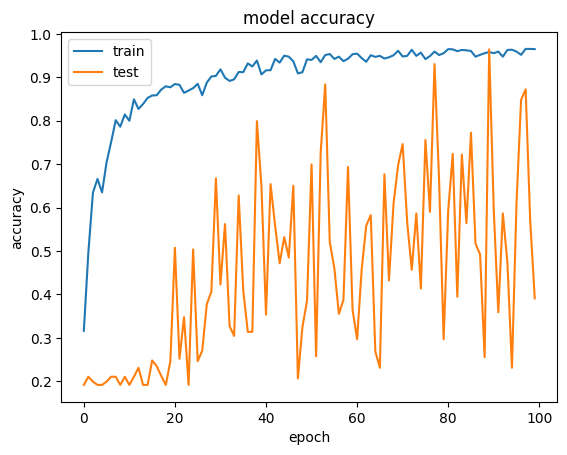

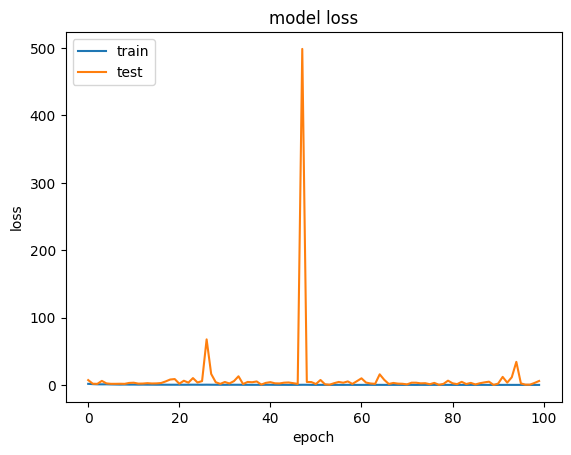

In [53]:
from tensorflow.keras.applications.resnet50 import preprocess_input

resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
                                        weights='imagenet', classes=5)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=5,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)
model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_resnet.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25, baseline=0.2, restore_best_weights=True)


filepath = 'resnet_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=100

history = model_resnet.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)




print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



### Conclusion of Resnet model

# Inception_V3

In [103]:
data2 = pd.DataFrame()
main_path = ''
path_Ak = main_path + 'Ak_aug'
path_Ala_Idris = main_path + 'Ala_Idris_aug'
path_Buzgulu = main_path + 'Buzgulu_aug'
path_Dimnit = main_path + 'Dimnit_aug'
path_Nazli = main_path + 'Nazli_aug'

data2['images_name'] = os.listdir(path_Ak) + os.listdir(path_Ala_Idris) + os.listdir(path_Buzgulu) + os.listdir(path_Dimnit) + os.listdir(path_Nazli)

classes2 = []
paths2 = []
for image in data2['images_name']:
#     print(image)
    class_ = image.split('_')[0]
    
    if class_ == 'Ala':
        class_='Ala_Idris'
        
    classes2.append(class_)
    paths2.append(main_path+class_+'_aug/'+image)

data2['classes'] = classes2
data2['path'] = paths2
print(len(data2))
data2.head()

2660


,images_name,classes,path
0,Ak_0_1444.png,Ak,Ak_aug/Ak_0_1444.png
1,Ak_0_239.png,Ak,Ak_aug/Ak_0_239.png
2,Ak_0_3411.png,Ak,Ak_aug/Ak_0_3411.png
3,Ak_0_9221.png,Ak,Ak_aug/Ak_0_9221.png
4,Ak_0_9529.png,Ak,Ak_aug/Ak_0_9529.png


In [104]:
df2 = data2.copy()
im2 = []
pic2 = []
label2 = []
INPUT_SIZE2=128



for i in range(len(df2)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']
    
#     print(type(p))
    
#     p= p+str("_aug")
    
#     print(p)
    

    image2=cv2.imread(p)
#     print(image)
    image2=Image.fromarray(image2,'RGB')
#     image2=Image.fromarray(image2)
    
#     image=Image.fromarray(image,'RGB')
#     print(image.size)
    #resize the image
    image2=image2.resize((INPUT_SIZE2,INPUT_SIZE2))
    #append image arry in dataset list and its label in label list
    im2.append(np.array(image2))
    
    if c == 'Ak':
        cl = 0
        
    elif c == 'Ala_Idris':
        cl = 1
    elif c == 'Buzgulu':
        cl = 2
    elif c == 'Dimnit':
        cl = 3
    elif c == 'Nazli':
        cl = 4
    
    pic2.append(image2)
    label2.append(cl)



In [105]:
dataset2 = im2

print(type(im2))
print(type(label2))

dataset2=np.array(dataset2)
label2=np.array(label2)

print(type(dataset2))
print(type(label2))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<ipython-input-106-a025f80318c7>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi2 = np.array(pic2)
<ipython-input-106-a025f80318c7>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi2 = np.array(pic2)


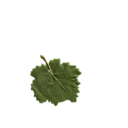

In [106]:
df2['im_array']= im2
df2['label']=label2
pi2 = np.array(pic2)
df2['pic']=pi2
df2.loc[1,'pic']

In [107]:
df2.shape

(2660, 6)

In [108]:
dataset2.shape

(2660, 128, 128, 3)

In [109]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(dataset2, label2, test_size = 0.2, random_state = 42)
              
print(x_train2.shape) 
print(y_train2.shape) 

x_train2 = normalize( x_train2, axis =1)
x_test2 = normalize( x_test2, axis =1)

num_classes = 5

y_train2 = keras.utils.np_utils.to_categorical(y_train2, num_classes)
y_test2 = keras.utils.np_utils.to_categorical(y_test2, num_classes)


(2128, 128, 128, 3)
(2128,)


87910968/87910968 [==============================] - 59s 1us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_80 (Conv2D)             (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_140 (Batch  (None, 63, 63, 32)  96          ['conv2d_80[0][0]']              
 Normalization)                                                                                   
                          

                                                                                                  
 batch_normalization_147 (Batch  (None, 13, 13, 64)  192         ['conv2d_87[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_150 (Batch  (None, 13, 13, 96)  288         ['conv2d_90[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 13, 13, 32)  96          ['conv2d_91[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_22 (Activation)     (None, 13, 13, 64)   0           ['batch_normalization_162[0][0]']
                                                                                                  
 conv2d_100 (Conv2D)            (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_103 (Conv2D)            (None, 13, 13, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_160 (Batch  (None, 13, 13, 48)  144         ['conv2d_100[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 6, 6, 768)    0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_62[0][0]']       
                                                                                                  
 conv2d_114 (Conv2D)            (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_174 (Batch  (None, 6, 6, 128)   384         ['conv2d_114[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_124 (Conv2D)            (None, 6, 6, 160)    122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_184 (Batch  (None, 6, 6, 160)   480         ['conv2d_124[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_44 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_184[0][0]']
                                                                                                  
 conv2d_125 (Conv2D)            (None, 6, 6, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_54 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_194[0][0]']
                                                                                                  
 conv2d_135 (Conv2D)            (None, 6, 6, 160)    179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_195 (Batch  (None, 6, 6, 160)   480         ['conv2d_135[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_55 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_195[0][0]']
                                                                                                  
 conv2d_13

 batch_normalization_205 (Batch  (None, 6, 6, 192)   576         ['conv2d_145[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_65 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_205[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_146 (Conv2D)            (None, 6, 6, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_201 (Batch  (None, 6, 6, 192)   576         ['conv2d_141[0][0]']             
 Normaliza

 conv2d_150 (Conv2D)            (None, 6, 6, 192)    147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_154 (Conv2D)            (None, 6, 6, 192)    258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_210 (Batch  (None, 6, 6, 192)   576         ['conv2d_150[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_214 (Batch  (None, 6, 6, 192)   576         ['conv2d_154[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_216 (Batch  (None, 2, 2, 320)   960         ['conv2d_156[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_78 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_218[0][0]']
                                                                                                  
 activation_79 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_219[0][0]']
                                                                                                  
 activation_82 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_222[0][0]']
                                                                                                  
 activation_83 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_223[0][0]']
          

                                                                                                  
 activation_91 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_231[0][0]']
                                                                                                  
 activation_92 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_232[0][0]']
                                                                                                  
 batch_normalization_233 (Batch  (None, 2, 2, 192)   576         ['conv2d_173[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_85 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_225[0][0]']
                                                                                                  
 mixed9_1 

67/67 [==============================] - 21s 311ms/step - loss: 0.8553 - accuracy: 0.6701 - val_loss: 0.8075 - val_accuracy: 0.6936
Epoch 15/100
67/67 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.6579
Epoch 15: val_accuracy did not improve from 0.73496
67/67 [==============================] - 20s 291ms/step - loss: 0.8612 - accuracy: 0.6579 - val_loss: 0.7077 - val_accuracy: 0.7331
Epoch 16/100
67/67 [==============================] - ETA: 0s - loss: 0.8700 - accuracy: 0.6598
Epoch 16: val_accuracy did not improve from 0.73496
67/67 [==============================] - 25s 369ms/step - loss: 0.8700 - accuracy: 0.6598 - val_loss: 0.7996 - val_accuracy: 0.7105
Epoch 17/100
67/67 [==============================] - ETA: 0s - loss: 0.8439 - accuracy: 0.6748
Epoch 17: val_accuracy did not improve from 0.73496
67/67 [==============================] - 25s 379ms/step - loss: 0.8439 - accuracy: 0.6748 - val_loss: 0.7974 - val_accuracy: 0.7180
Epoch 18/100
67/67 [========

Epoch 43/100
67/67 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.7190
Epoch 43: val_accuracy did not improve from 0.77256
67/67 [==============================] - 36s 535ms/step - loss: 0.7316 - accuracy: 0.7190 - val_loss: 0.6637 - val_accuracy: 0.7556
Epoch 44/100
67/67 [==============================] - ETA: 0s - loss: 0.7405 - accuracy: 0.7138
Epoch 44: val_accuracy did not improve from 0.77256
67/67 [==============================] - 35s 523ms/step - loss: 0.7405 - accuracy: 0.7138 - val_loss: 0.6606 - val_accuracy: 0.7669
Epoch 45/100
67/67 [==============================] - ETA: 0s - loss: 0.7234 - accuracy: 0.7227
Epoch 45: val_accuracy did not improve from 0.77256
67/67 [==============================] - 50s 754ms/step - loss: 0.7234 - accuracy: 0.7227 - val_loss: 0.6778 - val_accuracy: 0.7444
Epoch 46/100
67/67 [==============================] - ETA: 0s - loss: 0.7507 - accuracy: 0.7157
Epoch 46: val_accuracy did not improve from 0.77256
67/67 [=====

Epoch 72/100
67/67 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.7420
Epoch 72: val_accuracy did not improve from 0.80263
67/67 [==============================] - 31s 461ms/step - loss: 0.6782 - accuracy: 0.7420 - val_loss: 0.6655 - val_accuracy: 0.7688
Epoch 73/100
67/67 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.7495
Epoch 73: val_accuracy did not improve from 0.80263
67/67 [==============================] - 22s 321ms/step - loss: 0.6769 - accuracy: 0.7495 - val_loss: 0.5844 - val_accuracy: 0.7857
Epoch 74/100
67/67 [==============================] - ETA: 0s - loss: 0.7084 - accuracy: 0.7209
Epoch 74: val_accuracy did not improve from 0.80263
67/67 [==============================] - 33s 490ms/step - loss: 0.7084 - accuracy: 0.7209 - val_loss: 0.6706 - val_accuracy: 0.7613
Epoch 75/100
67/67 [==============================] - ETA: 0s - loss: 0.7096 - accuracy: 0.7148
Epoch 75: val_accuracy did not improve from 0.80263
67/67 [=====

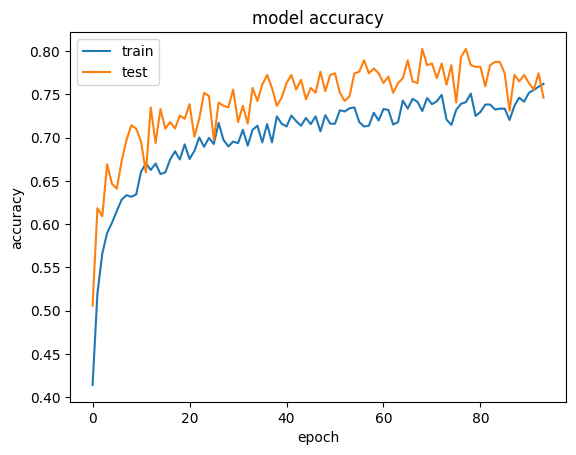

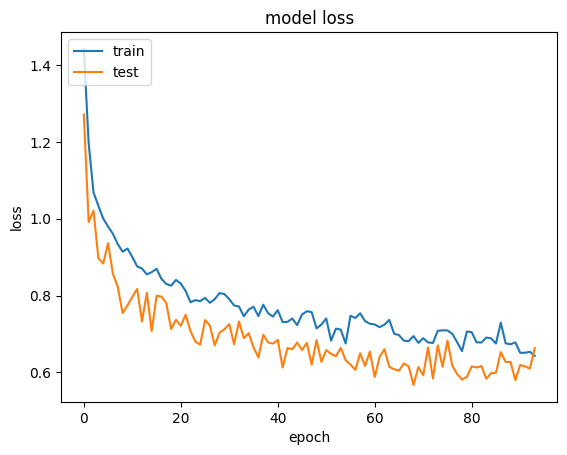

In [110]:
# from tensorflow.keras.applications.resnet50 import preprocess_input

# resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
#                                         weights='imagenet', classes=5)


from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train2.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=5, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()

# x = GlobalAveragePooling2D()(resnet.output)
# x = Dense(units=512, activation='relu')(x)
# x = Dense(units=512, activation='relu')(x)
# x = Dropout(0.5)(x)

# output = Dense(units=5,activation = 'softmax')(x)
# model_resnet = Model(resnet.input, output)
# model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25, baseline=0.2, restore_best_weights=True)


#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=4, min_lr=0.0005)

# filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
filepath = 'inception_v3_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


#     datagen_preprocessing =ImageDataGenerator(
#                                         rotation_range=40,
#                                         width_shift_range=0.2,
#                                         height_shift_range=0.2,
#                                         zoom_range=0.1,
#                                         horizontal_flip=True,
#                                         vertical_flip=True,
#                                         fill_mode='nearest')

epoch=100

history = model_inception.fit(datagen_preprocessing.flow(x_train2,y_train2,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test2, y_test2),
                            callbacks=[checkpoint,es],
                            shuffle=True)


# history= model.fit(x_train, y_train,
#               batch_size=batch_size,
#               epochs=100,
#               validation_data=(x_test, y_test),
#               callbacks=[es],
#               shuffle=True)


print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test2, y_test2, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# global df_a4

# df_a4=df_a4.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
#                     'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)